# Reading NICER observation data in Python

See 'WhatsInAnObsID.md' for a brief description of how the observation directory is structured and what type of data each file stores.

In this notebook, we will open up different files to see how the data is stored and how we can manipulate it.

Below each table there are some descriptions about what different columns mean

In [1]:
# Define filenames to variables

att_file = 'ni1070020426.att'
cat_file = 'ni1070020426.cat'
mkf_file = 'ni1070020426.mkf'
orb_file = 'ni1070020426.orb'
hk_file = 'ni1070020426_0mpu0.hk'

#For each of these files, we can read them into python using an astropy table

from astropy.table import Table
from IPython.display import display


table_list = [ Table.read(fname, hdu=1) for fname in [att_file, cat_file, mkf_file, orb_file, hk_file] ]
att_table, cat_table, mkf_table, orb_table, hk_table = table_list

#Next try printing out different tables

# Attitude File

In [2]:
#I'm using display here, instead of print, because it formats beter in notebooks
display(att_table)

TIME,QPARAM [4],STATE,MODE,SUBMODE_AZ,SUBMODE_EL,ST_VALID,QUATSRC,FINEMEAS
s,,,,,,,,
float64,float64,uint8,uint8,uint8,uint8,uint8,uint8,uint8
162182202.020424843,-0.07502205116189377 .. 0.022193810537336833,1,1,2,2,1,1,0
162182202.120424271,-0.07497367257607489 .. 0.022218300014128185,1,1,2,2,1,1,0
162182202.220424652,-0.07511436937636859 .. 0.02216006814960694,1,1,2,2,1,1,0
162182202.320624352,-0.0750776226457438 .. 0.022179139635288534,1,1,2,2,1,1,0
162182202.420424461,-0.0749275515065425 .. 0.022239725434853704,1,1,2,2,1,1,0
162182202.520625114,-0.07489132918937383 .. 0.02225792605480215,1,1,2,2,1,1,0
162182202.620425224,-0.0749155573928603 .. 0.02225893901147099,1,1,0,0,1,1,0
162182202.720425606,-0.07487134541394334 .. 0.0222817339929323,1,1,1,1,1,1,0


The attitude file provides information about the telescope attitude (position, slewing, pointing). 

The st_valid column gives the status of the star tracker solution. If st_valid is not 1, we would filter those times out in most cases. 

The submode_az and submode_el give information on the azimuthal and equitorial pointing. Times when these parameters don't equal 2 are filtered out during standard processing. 

In [3]:
#What are the values in the ST_VALID column? 0 means bad, 1 means good
print('ST_VALID values: ', list(set(att_table['ST_VALID'])))
print('SUBMODE_AZ values', list(set(att_table['SUBMODE_AZ'])))
print('SUBMODE_EL values', list(set(att_table['SUBMODE_EL'])))

ST_VALID values:  [0, 1]
SUBMODE_AZ values [0, 1, 2]
SUBMODE_EL values [0, 1, 2, 4]


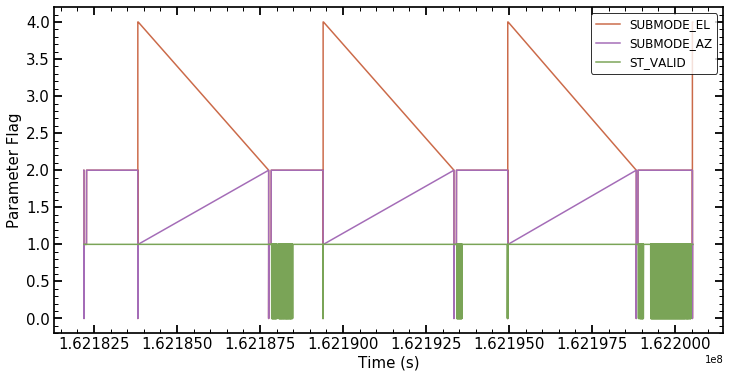

In [4]:
# We could also plot these values, just for fun 

import matplotlib.pyplot as plt
from niutils import plotparams, DoubleY

colors=["#cb6a49", "#a46cb7", "#7aa457"]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax = plotparams(ax)
ax.plot(att_table['TIME'], att_table['SUBMODE_EL'], color=colors[0], label='SUBMODE_EL')
ax.plot(att_table['TIME'], att_table['SUBMODE_AZ'], color=colors[1], label='SUBMODE_AZ')
ax.plot(att_table['TIME'], att_table['ST_VALID'], color=colors[2], label='ST_VALID')
ax.legend(fontsize=12, edgecolor='black', loc='upper right')
ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('Parameter Flag', fontsize=15)
plt.show()


In [Bogdanov et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...887L..25B/abstract) they choose times where SUBMODE_EL=SUBMODE_AZ=2 and ST_VALID=1. We can identify when those criteria would be met for our observation using the above plot. 

# Catalog File

In [5]:
display(cat_table)

FILENAME,FORMAT,TYPE,FILECLAS,DESCRIP,FILESIZE,ARCHSIZE,CHECKSUM,GZIP_CRC,CKSUM_B4
,,,,,kilobytes,kilobytes,,,
bytes64,bytes16,bytes32,bytes32,bytes64,uint32,uint32,uint32,bytes8,uint32
auxil/ni1070020426.cat,FITS,tapecat,catalog,FITS-format product file catalog,12,12,1311798759,ffffffff,1311798759
auxil/ni1070020426.att,FITS,attitude,attitude,Attitude file,6095,4103,1051628086,c325ee8b,2522019793
auxil/ni1070020426.orb,FITS,orbit,orbit,Orbit file,65,42,3397434616,e3bbacdf,3426821317
auxil/ni1070020426.mkf,FITS,filter,filter,Filter file,25105,13090,1983052097,011b13e3,325294246
xti/event_uf/ni1070020426_0mpu0_uf.evt,FITS,xti_lv1,event,MPU 0 unfiltered event file,315611,139520,3936196996,1def60d7,2768781587
xti/event_uf/ni1070020426_0mpu1_uf.evt,FITS,xti_lv1,event,MPU 1 unfiltered event file,473125,205579,4065103229,e98d7c91,1702952691
xti/event_uf/ni1070020426_0mpu2_uf.evt,FITS,xti_lv1,event,MPU 2 unfiltered event file,432183,187896,3797774252,57cefc6c,2586490634
xti/event_uf/ni1070020426_0mpu3_uf.evt,FITS,xti_lv1,event,MPU 3 unfiltered event file,472444,206978,4023212585,de86d2fb,445425120


As shown in the table above, the catalog file displays exactly what we might expect -- a catalog of all the files in a typical observation directory. If you downloaded this observation directory, you should find all of these files. 

# Filter File

In [6]:
display(mkf_table)
print("List of all the columns:")
print(mkf_table.colnames)

TIME,POSITION [3],VELOCITY [3],QUATERNION [4],PNTUNIT [3],POLAR [3],RA,DEC,ROLL,SAT_LAT,SAT_LON,SAT_ALT,ELV,BR_EARTH,SUNSHINE,FOV_FLAG,SUN_ANGLE,MOON_ANGLE,RAM_ANGLE,ANG_DIST,SAA,SAA_TIME,COR_ASCA,COR_SAX,MCILWAIN_L,SUN_RA,SUN_DEC,MOON_RA,MOON_DEC,EARTH_RA,EARTH_DEC,TIME_ADJ,ST_BBO,ST_VALID,ST_OBJECTS,ST_VIDEO_VDC,ATT_ANG_AZ,ATT_ANG_EL,RA_CMD,DEC_CMD,ATT_ERR_AZ,ATT_ERR_EL,ATT_STATE,ATT_MODE,ATT_SUBMODE_AZ,ATT_SUBMODE_EL,TARG_CMD,PPS_SOURCE,PPS_ERR_LOWPASS,GPS_INIT,GPS_CONVERGED,NICER_SAA,ST_STARS,ST_FAILCODE,"MPU_ALL_COUNT [7,8]","MPU_OVER_COUNT [7,8]","MPU_UNDER_COUNT [7,8]","MPU_XRAY_COUNT [7,8]",TOT_ALL_COUNT,TOT_UNDER_COUNT,TOT_OVER_COUNT,TOT_XRAY_COUNT,"FPM_ON [7,8]",NUM_FPM_ON,FPM_RATIO_REJ_COUNT,FPM_XRAY_PI_0000_0025,FPM_XRAY_PI_0035_0200,FPM_XRAY_PI_0200_0800,FPM_XRAY_PI_0800_1200,FPM_XRAY_PI_1200_1500,FPM_XRAY_PI_1500_1700,FPM_XRAY_PI_COUNT,MPU_DEADTIME [7],"MPU_DOUBLE_COUNT [7,8]","MPU_FT_COUNT [7,8]","MPU_NOISE25_COUNT [7,8]","MPU_OVERONLY_COUNT [7,8]","MPU_UNDERONLY_COUNT [7,8]",FPM_DOUBLE_COUNT,FPM_OVERONLY_COUNT,FPM_UNDERONLY_COUNT,FPM_FT_COUNT,FPM_NOISE25_COUNT,"MPU_FT_PI_AVG [7,8]","MPU_FT_PI_ERR [7,8]","MPU_FT_PI_FAST_AVG [7,8]","MPU_FT_PI_FAST_ERR [7,8]","MPU_NOISE25_PI_AVG [7,8]","MPU_NOISE25_PI_ERR [7,8]",ISS_ATT_STATE,ROBO_STATE,VEHICLE_SOYUZ_DC1,VEHICLE_SOYUZ_MRM1,VEHICLE_SOYUZ_MRM2,VEHICLE_SOYUZ_SM
s,km,km / s,,,"rad, rad, km",deg,deg,deg,deg,deg,km,deg,deg,,,deg,deg,deg,deg,,s,GeV/c,GeV/c,,deg,deg,deg,deg,deg,deg,s,,,,V,deg,deg,deg,deg,deg,deg,,,,,,,s,,,,,,,,,,,,,,,,,,,,,,,,s,,,,,,,,,,,chan,chan,chan,chan,chan,chan,,,,,,
float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,uint8,uint8,uint8,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8,uint8,uint16,uint32,float64,uint8,uint8,uint8,uint8,uint8,int16,int16,int16,int16,int32,int32,int32,int32,bool,int32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int16,int16,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,uint8,uint8,uint8,uint8,uint8
162182206.000000,-1442.539 .. 4061.100,6.516 .. 3.868,-0.07179512 .. 0.00922344,-0.08484423 .. -0.56497777,6776.4062 .. 0.6426263,264.097931,-34.400745,183.48,36.8198,64.6591,6776.406,37.97,37.97,1,0,67.32,93.74,119.12,63.1841,0,-999.0,9.88,7.80,1.44,333.908142,-10.800742,173.900665,6.346863,74.578285,-36.819775,162182204.0,1,1,18,2.190,-36.45407,113.19878,294.91067,21.58309,76.16118,34.24593,1,1,1,1,40,1,1.0859048135721977e-09,1,1,0,16,0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,0,0,0,0,False .. False,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000 .. 0.000000,0 .. 0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,nan,nan,nan,0.00,0.00,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,+XVV,0,0,1,0,0
162182207.000000,-1436.022 .. 4064.965,6.518 .. 3.862,-0.07042089 .. 0.00110963,-0.07013816 .. -0.55308920,6776.4 .. 0.6433397,265.170715,-33.579205,184.40,36.8606,64.7179,6776.400,38.62,38.62,1,0,66.40,94.56,118.03,62.0167,0,-999.0,9.88,7.78,1.44,333.908142,-10.800739,173.901138,6.346076,74.641258,-36.860649,162182205.0,1,0,0,2.190,-35.39030,113.87573,294.91067,21.58309,75.10067,33.74525,1,1,1,1,40,1,1.0859048135721977e-09,1,1,0,0,80,0 .. 0,0 .. 0,0 .. 0,0 .. 0,0,0,0,0,False .. False,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000 .. 0.000000,0 .. 0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,nan,nan,nan,0.00,0.00,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,+XVV,0,0,1,0,0
162182208.000000,-1429.503 .. 4068.824,6.520 .. 3.857,0.06958427 .. 0.00690717,-0.05609509 .. -0.54195684,6776.3936 .. 0.64405245,266.172791,-32.816948,185.33,36.9015,64.7768,6776.394,39.21,39.21,1,0,65.52,95.34,117.01,60.9308,0,-999.0,9.88,7.77,1.44,333.908142,-10.800737,173.901611,6.345289,74.704292,-36.901485,162182206.0,1,0,0,2.229,-34.36991,114.53085,2

List of all the columns:
['TIME', 'POSITION', 'VELOCITY', 'QUATERNION', 'PNTUNIT', 'POLAR', 'RA', 'DEC', 'ROLL', 'SAT_LAT', 'SAT_LON', 'SAT_ALT', 'ELV', 'BR_EARTH', 'SUNSHINE', 'FOV_FLAG', 'SUN_ANGLE', 'MOON_ANGLE', 'RAM_ANGLE', 'ANG_DIST', 'SAA', 'SAA_TIME', 'COR_ASCA', 'COR_SAX', 'MCILWAIN_L', 'SUN_RA', 'SUN_DEC', 'MOON_RA', 'MOON_DEC', 'EARTH_RA', 'EARTH_DEC', 'TIME_ADJ', 'ST_BBO', 'ST_VALID', 'ST_OBJECTS', 'ST_VIDEO_VDC', 'ATT_ANG_AZ', 'ATT_ANG_EL', 'RA_CMD', 'DEC_CMD', 'ATT_ERR_AZ', 'ATT_ERR_EL', 'ATT_STATE', 'ATT_MODE', 'ATT_SUBMODE_AZ', 'ATT_SUBMODE_EL', 'TARG_CMD', 'PPS_SOURCE', 'PPS_ERR_LOWPASS', 'GPS_INIT', 'GPS_CONVERGED', 'NICER_SAA', 'ST_STARS', 'ST_FAILCODE', 'MPU_ALL_COUNT', 'MPU_OVER_COUNT', 'MPU_UNDER_COUNT', 'MPU_XRAY_COUNT', 'TOT_ALL_COUNT', 'TOT_UNDER_COUNT', 'TOT_OVER_COUNT', 'TOT_XRAY_COUNT', 'FPM_ON', 'NUM_FPM_ON', 'FPM_RATIO_REJ_COUNT', 'FPM_XRAY_PI_0000_0025', 'FPM_XRAY_PI_0035_0200', 'FPM_XRAY_PI_0200_0800', 'FPM_XRAY_PI_0800_1200', 'FPM_XRAY_PI_1200_1500', 'F

The filter file contains information about the observation for each second. Some of this information is pulled from the attitude and orbit files. 

The power of this files comes from its ability to generate GTIs (good time intervals). If we know we'd like to exclude times where the sun angle is less than 50 degrees, for example, we can easily identify the corresponding observation times to get rid of. This reduciton process is typically done using nimaketime

Other columns can also be added to the table. The most common column added is the geomagnetic index, KP. A script for adding KP values to MKFs can be found in [NICERsoft](https://github.com/paulray/NICERsoft/blob/master/scripts/add_kp.py)

Here, we can plot some of the relevant parameters as a function of observation time. 

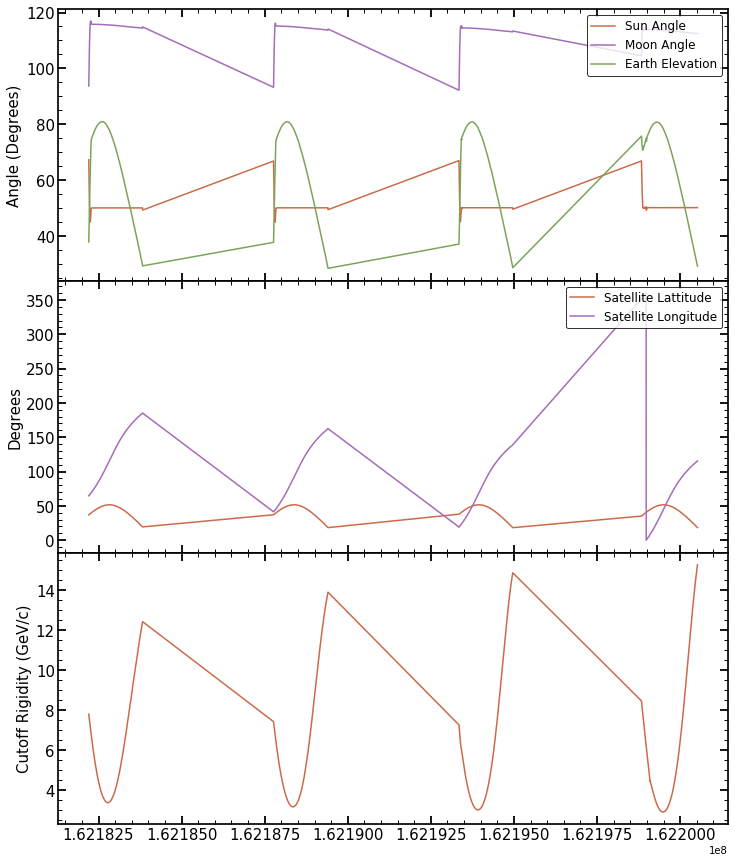

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
plt.subplots_adjust(hspace=0)

ax[0].plot(mkf_table['TIME'], mkf_table['SUN_ANGLE'], color=colors[0], label='Sun Angle')
ax[0].plot(mkf_table['TIME'], mkf_table['MOON_ANGLE'], color=colors[1], label='Moon Angle')
ax[0].plot(mkf_table['TIME'], mkf_table['ELV'], color=colors[2], label='Earth Elevation')

ax[0].set_ylabel('Angle (Degrees)', fontsize=15)

ax[1].plot(mkf_table['TIME'], mkf_table['SAT_LAT'], color=colors[0], label='Satellite Lattitude')
ax[1].plot(mkf_table['TIME'], mkf_table['SAT_LON'], color=colors[1], label='Satellite Longitude')
ax[1].set_ylabel('Degrees', fontsize=15)

ax[2].plot(mkf_table['TIME'], mkf_table['COR_SAX'], color=colors[0])
ax[2].set_ylabel('Cutoff Rigidity (GeV/c)', fontsize=15)


for a in ax:
    a = plotparams(a)
    if a.get_legend_handles_labels() != ([], []):
        a.legend(loc='upper right', fontsize=12, edgecolor='black')

# Orbit File

The orbit file contains information on the satellite position and velocity. This is actually converted to more 'useful' information in the filterfile using niprefilter. 

In [8]:
display(orb_table)

TIME,X,Y,Z,Vx,Vy,Vz,GEONS_J2K_TIME_RAW0,GEONS_J2K_WEEK0,ORIG_TIME,QUALITY
s,m,m,m,m / s,m / s,m / s,s,week,s,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8
162182205.456059724,-1446083.072,-5230021.881,4058995.208,6515.274,1210.4997815493073,3870.426507874939,355021.4560597162,2041.0,162182210.58233643,0
162182215.456059724,-1380839.678,-5217582.778,4097438.346,6533.357,1277.3381086072468,3818.0954929655522,355031.4560597162,2041.0,162182220.584198,0
162182225.456059724,-1315419.737,-5204476.087,4135355.836,6550.604,1344.0117174202878,3765.276123629545,355041.4560597162,2041.0,162182230.57954407,0
162182235.456059724,-1249831.033,-5190703.502,4172742.311,6567.013,1410.510943149849,3711.9736632466147,355051.4560597162,2041.0,162182240.58616638,0
162182245.456059724,-1184082.414,-5176266.940,4209593.633,6582.581,1476.8276141292708,3658.1973736854675,355061.4560597162,2041.0,162182250.6132965,0
162182255.456059724,-1118182.444,-5161168.170,4245904.599,6597.307,1542.9537499412795,3603.9519364278813,355071.4560597162,2041.0,162182260.59368896,0
162182265.456059724,-1052139.341,-5145408.962,4281670.729,6611.188,1608.881411746869,3549.245166991464,355081.4560597162,2041.0,162182270.58389282,0
162182275.456059724,-985962.544,-5128991.845,4316888.346,6624.222,1674.6018632814844,3494.0870035179696,355091.4560597162,2041.0,162182280.57722473,0


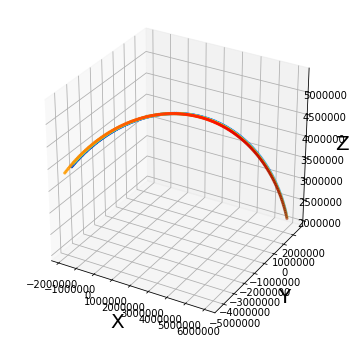

In [9]:
#I suppose you could plot this data, but I'm not sure where it would be useful

from mpl_toolkits import mplot3d

fig, ax = plt.subplots(1, 1, figsize=(6,6), subplot_kw={'projection':'3d'})
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)

ax.scatter3D(orb_table['X'], orb_table['Y'], orb_table['Z'], c=np.arange(len(orb_table)), cmap=plt.get_cmap('jet'), s=5)

# Housekeeping File

To be honest, I'm not sure when we would use this file. It is also included in niprefilter and thus the more relevant MPU statistics information is contained in the filter file. 

In [10]:
display(hk_table)

TIME,TICK_LOW32,MPU_P33D_VOLT,MPU_P5D_VOLT,MPU_M5D_VOLT,MPU_P33TEC_VOLT,MPU_P33M_VOLT,MPU_GNDD_VOLT,MPU_HV_VOLT,MPU_D_TEMP,MPU_GNDA_VOLT,MPU_M5A_VOLT,MPU_P5A_VOLT,MPU_P25R_VOLT,MPU_P3R_VOLT,MPU_A_TEMP,MPU_PWRBRDG_TEMP,MPU_BAD_CSUM,MPU_INVALID_PKT,MPU_INVALID_ID,MPU_INVALID_MPU,MPU_LOWMEM_FIFO,MPU_LOWMEM_SCI,MPU_LOWMEM_OTHER,MPU_ALL_COUNT [8],MPU_OVER_COUNT [8],MPU_UNDER_COUNT [8],MPU_XRAY_COUNT [8],MPU_FPM_TEMP [8],MPU_PID_TEMP [8],MPU_HOTSIDE_TEMP [8],MPU_TEC_I [8],MPU_TEC_VOLT [8],MPU_BIAS_VOLT [8],MPU_FAST_LLD [8],MPU_SLOW_LLD [8],PACKET_FORMAT,GIT_HASH,COMPILE_DATE
s,,V,V,V,V,V,V,V,Celsius,V,V,V,V,V,Celsius,Celsius,,,,,,,,,,,,Celsius,,Celsius,mA,V,V,V,V,,,
float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float64,int16,float64,float64,float64,float64,float64,float64,uint8,int32,bytes16
162182202.000000000,4130856805,3.275,4.852,-5.109,3.211,3.270,0.000,-150.4,39.25,0.000,-5.109,4.831,2.504,3.005,35.275,503.125,0,0,0,0,10389,58447,0,56 .. 103,0 .. 2,24 .. 69,32 .. 32,-55.2 .. -55.2,1739 .. 1733,3.5 .. 1.4,197.86 .. 200.02,1.560 .. 1.579,-124.0 .. -124.0,0.757 .. 0.756,0.729 .. 0.722,5,710862,2016-02-04T22:21
162182203.000000000,4156660318,3.281,4.852,-5.115,3.211,3.275,0.000,-150.4,39.25,0.000,-5.112,4.823,2.504,3.005,35.382,503.125,0,0,0,0,10389,58447,0,36 .. 77,1 .. 2,18 .. 53,17 .. 22,-55.2 .. -55.2,1739 .. 1733,3.5 .. 1.4,197.86 .. 198.94,1.560 .. 1.579,-124.0 .. -124.0,0.757 .. 0.756,0.729 .. 0.722,5,710862,2016-02-04T22:21
162182204.000000000,4182463832,3.281,4.846,-5.121,3.211,3.275,0.000,-150.4,39.25,0.000,-5.114,4.821,2.504,3.005,35.382,503.125,0,0,0,0,10389,58447,0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,-55.2 .. -55.2,1739 .. 1733,3.5 .. 1.4,197.86 .. 200.02,1.560 .. 1.575,-124.0 .. -124.0,0.757 .. 0.756,0.729 .. 0.722,5,710862,2016-02-04T22:21
162182205.000000000,4208267345,3.281,4.846,-5.115,3.211,3.275,0.000,-150.4,39.25,0.000,-5.112,4.823,2.504,3.005,35.382,503.125,0,0,0,0,10389,58447,0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,-55.2 .. -55.2,1739 .. 1733,3.5 .. 1.4,197.86 .. 200.56,1.560 .. 1.575,-124.0 .. -124.0,0.757 .. 0.756,0.729 .. 0.722,5,710862,2016-02-04T22:21
162182206.000000000,4234070859,3.281,4.846,-5.115,3.211,3.270,0.000,-150.2,39.25,0.000,-5.112,4.823,2.504,3.005,35.488,503.125,0,0,0,0,10389,58447,0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,-55.2 .. -55.2,1739 .. 1733,3.5 .. 1.4,197.33 .. 200.02,1.560 .. 1.579,-124.0 .. -123.8,0.757 .. 0.757,0.728 .. 0.722,5,710862,2016-02-04T22:21
162182207.000000000,4259874372,3.281,4.846,-5.115,3.211,3.275,0.000,-150.4,39.25,0.000,-5.112,4.823,2.504,3.005,35.382,503.125,0,0,0,0,10389,58447,0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,-55.2 .. -55.2,1739 .. 1733,3.5 .. 1.4,198.40 .. 200.02,1.560 .. 1.579,-124.0 .. -124.0,0.757 .. 0.756,0.729 .. 0.722,5,710862,2016-02-04T22:21
162182208.000000000,4285677885,3.281,4.846,-5.115,3.211,3.270,0.000,-150.4,39.25,0.000,-5.112,4.823,2.504,3.005,35.382,503.125,0,0,0,0,10389,58447,0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,-55.2 .. -55.2,1739 .. 1733,3.5 .. 1.4,197.33 .. 199.48,1.560 .. 1.579,-124.0 .. -123.8,0.757 .. 0.755,0.729 .. 0.722,5,710862,2016-02-04T22:21
162182209.000000000,16514103,3.281,4.852,-5.115,3.211,3.275,0.000,-150.4,39.25,0.000,-5.112,4.823,2.504,3.005,35.488,503.125,0,0,0,0,10389,58447,0,0 .. 0,0 .. 0,0 .. 0,0 .. 0,-55.2 .. -55.2,1739 .. 1733,3.5 .. 1.4,197.33 .. 200.02,1.560 .. 1.579,-124.0 .. -124.0,0.757 .. 0.756,0.729 .. 0.722,5,710862,2016-02-04T22:21
